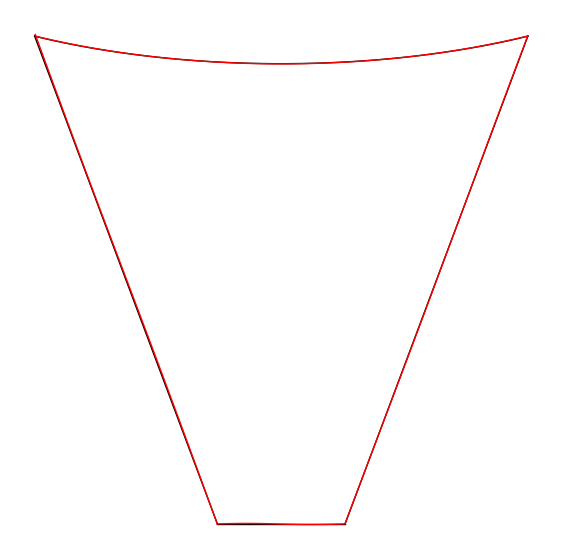

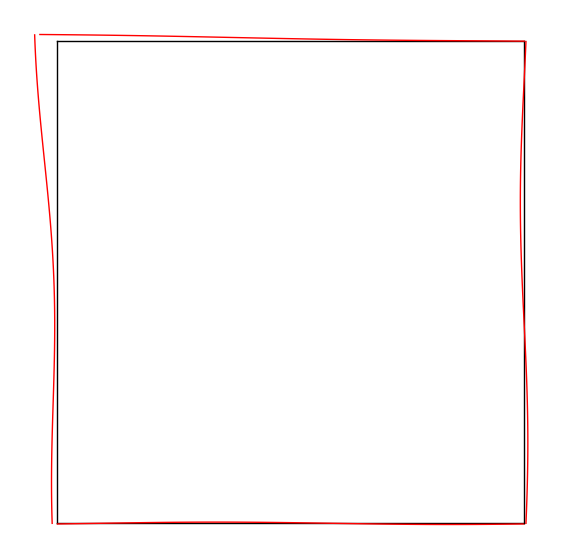

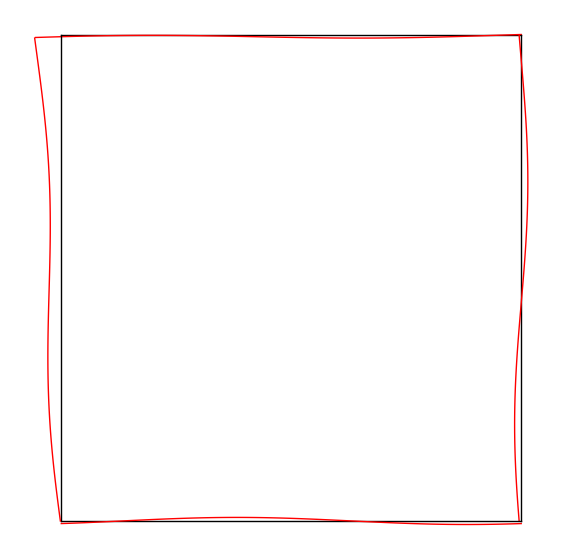

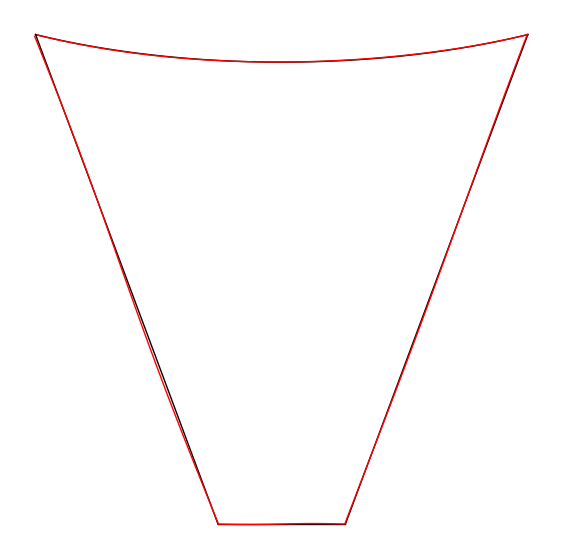

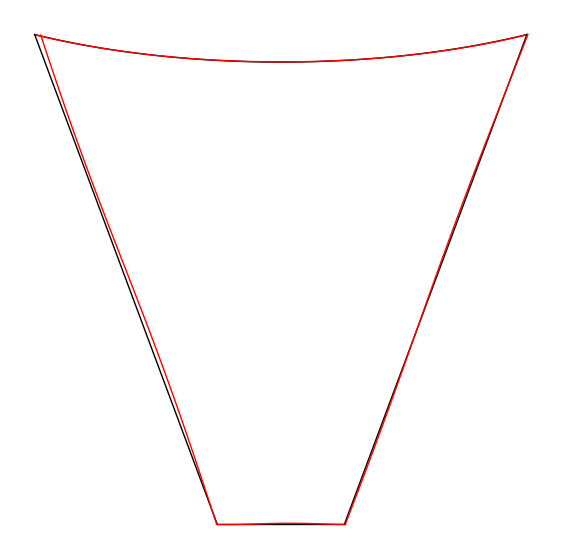

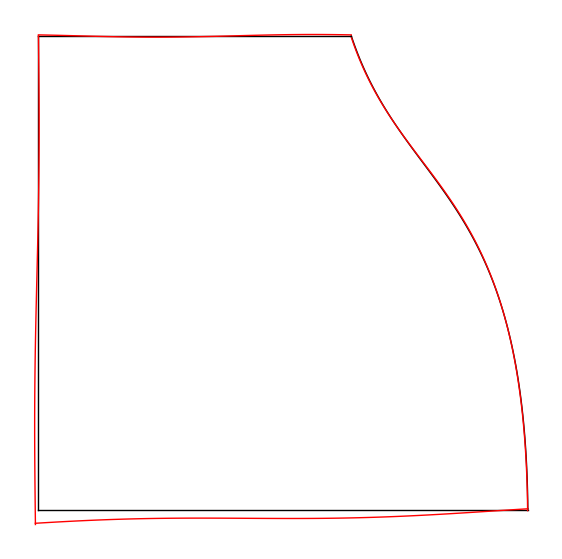

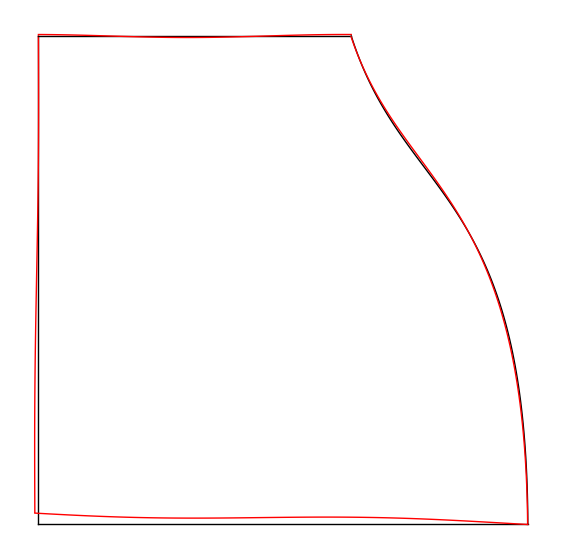

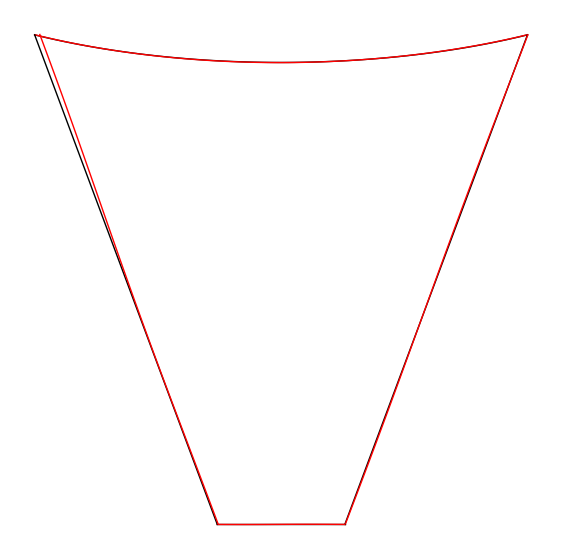

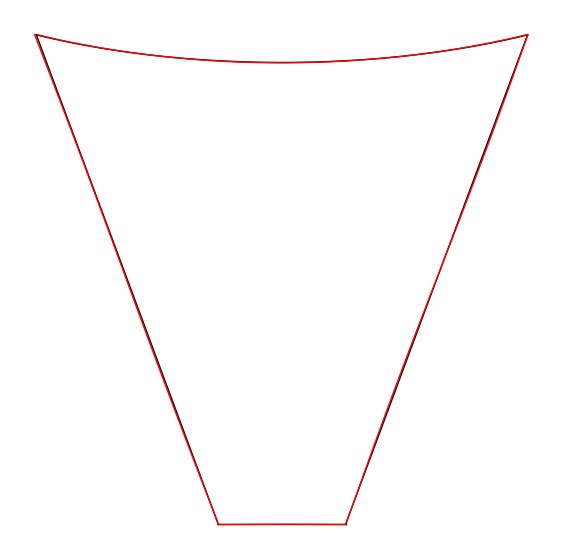

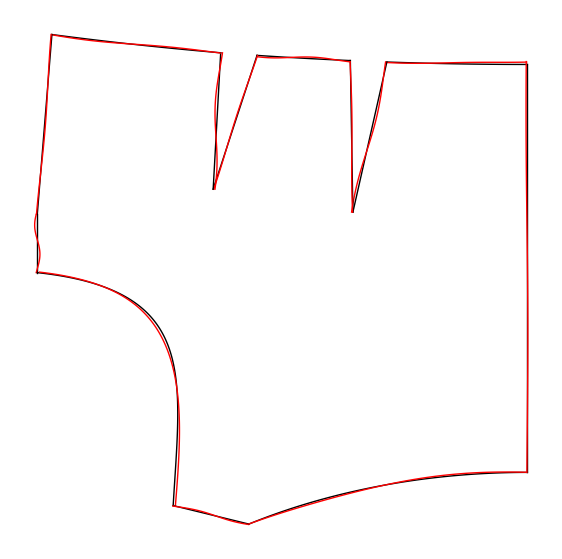

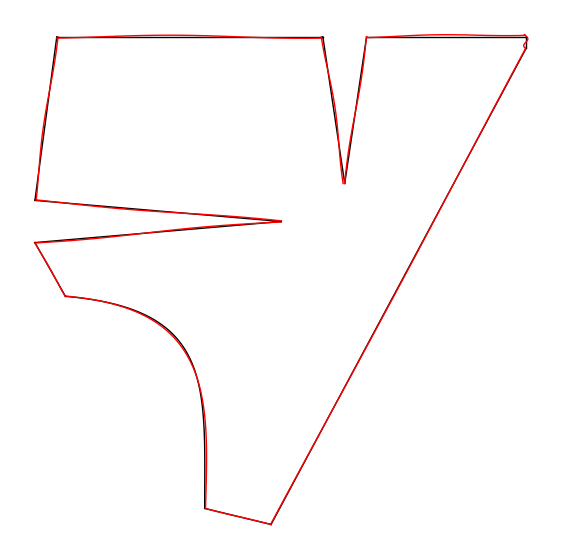

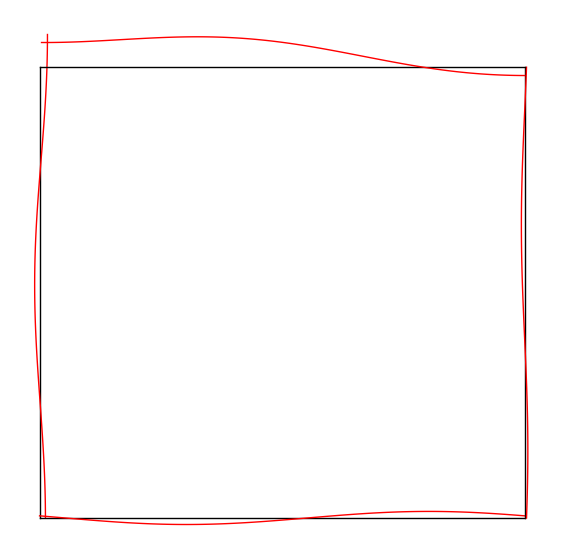

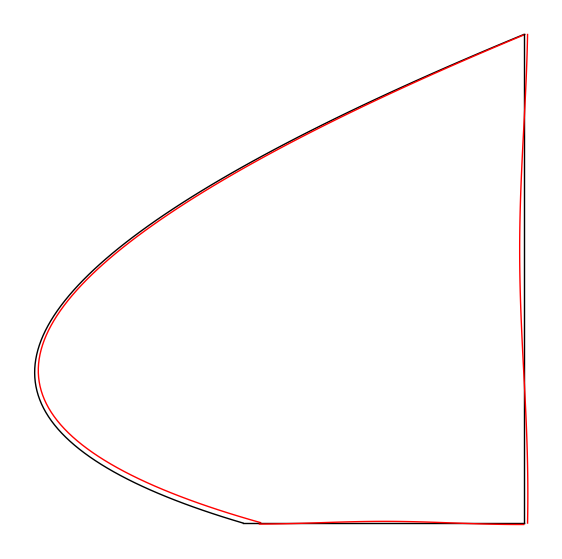

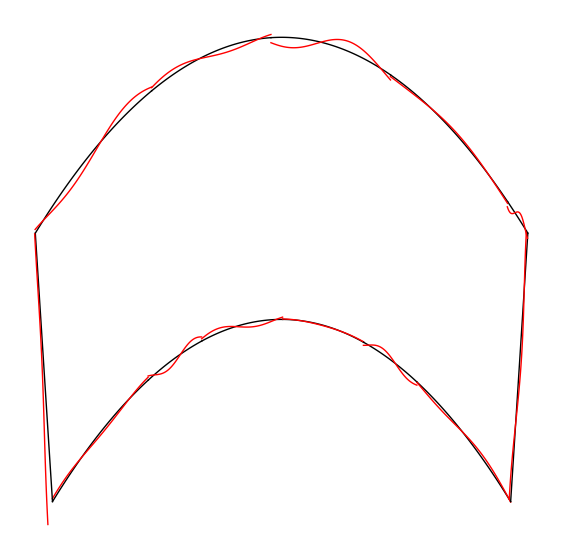

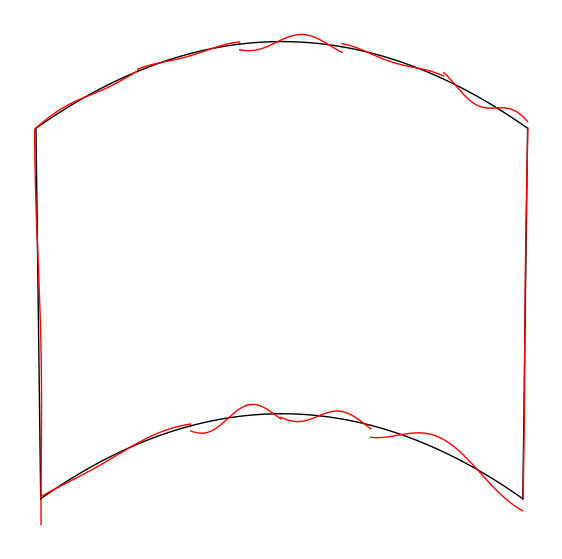

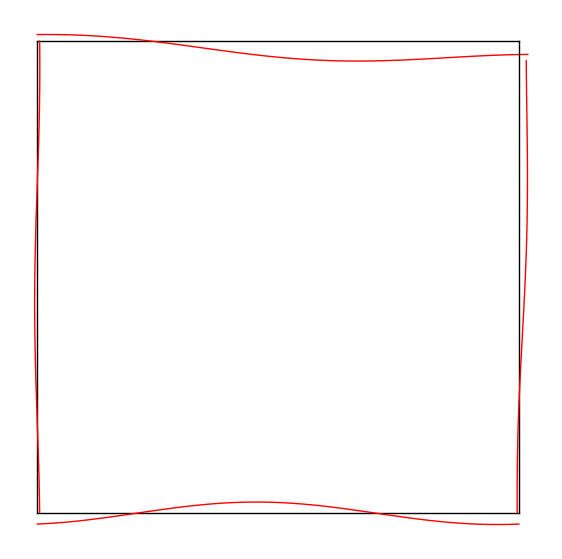

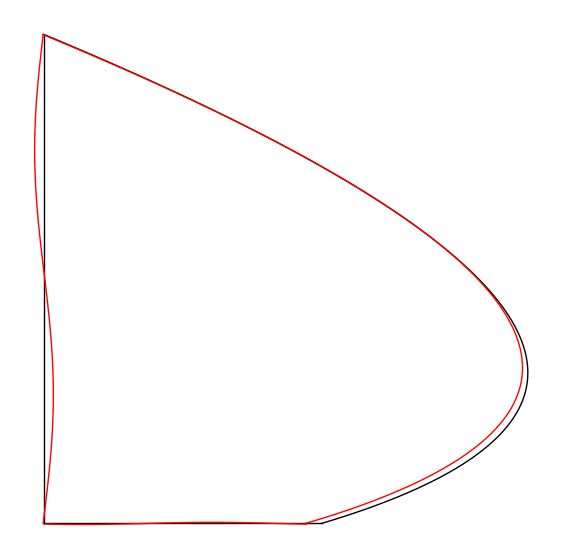

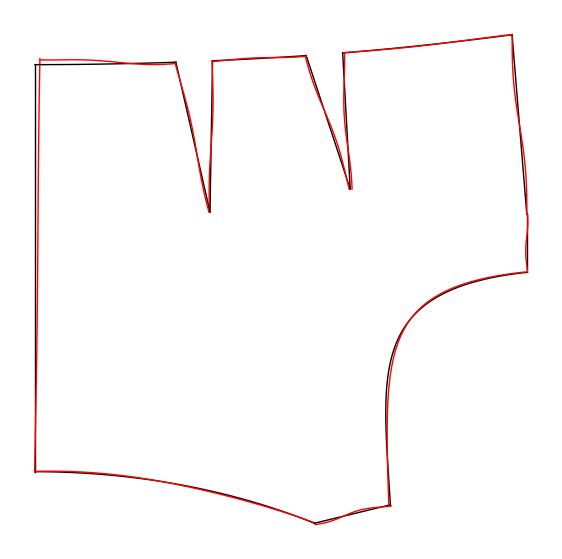

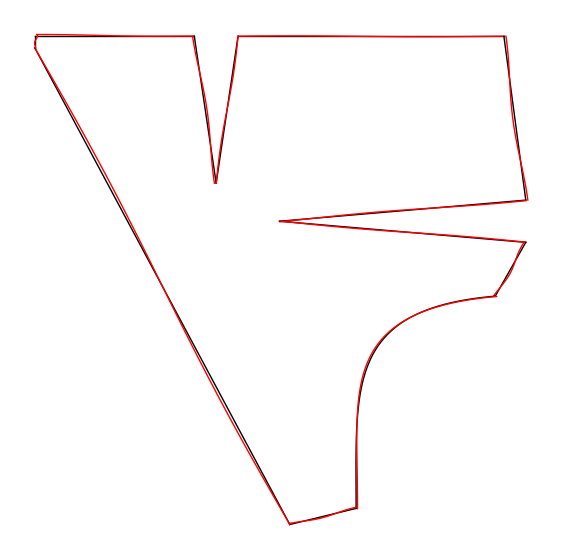

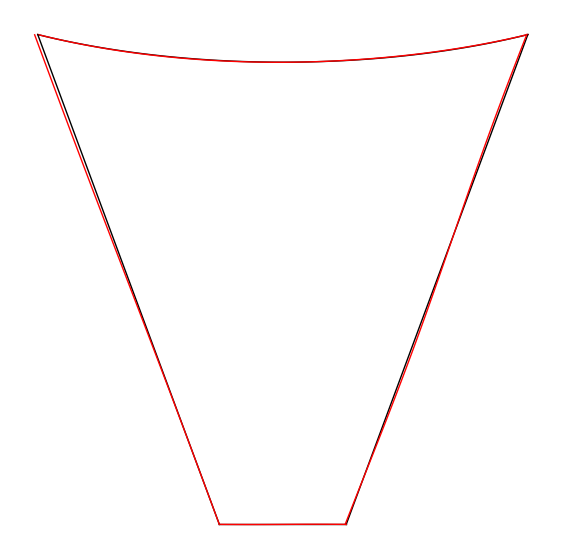

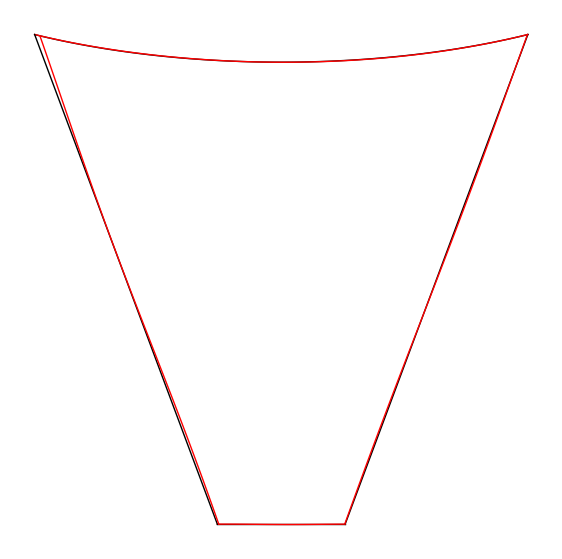

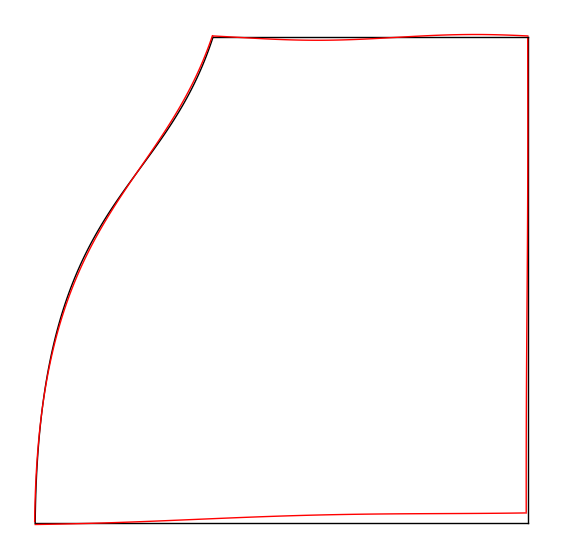

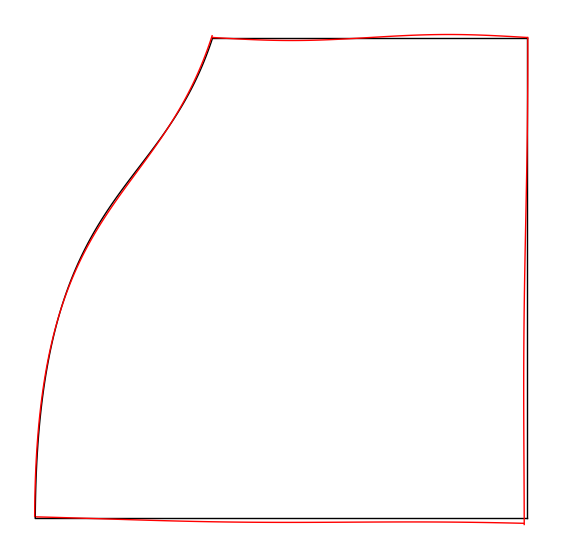

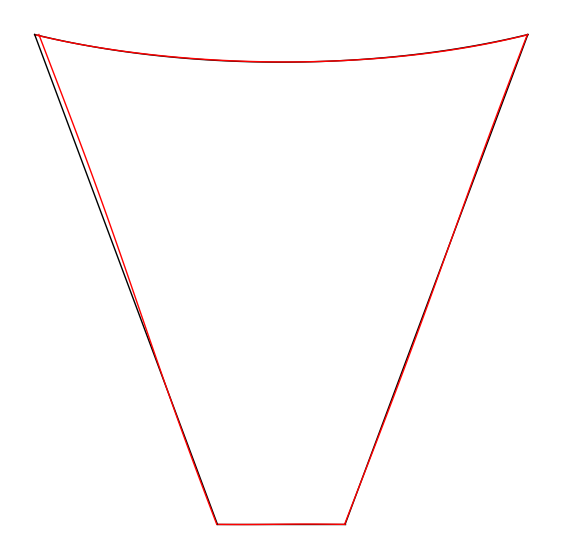

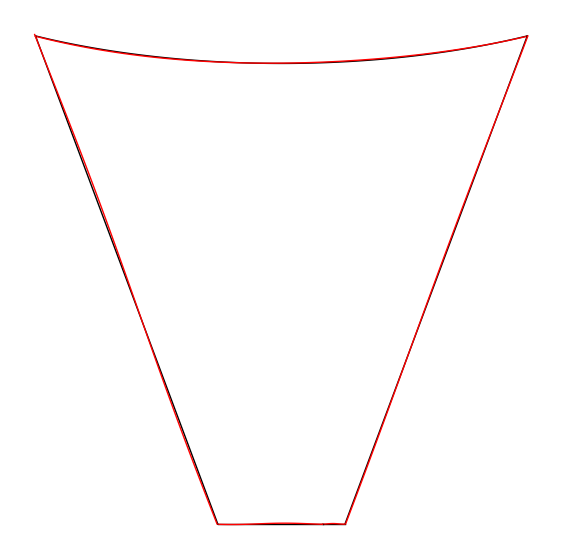

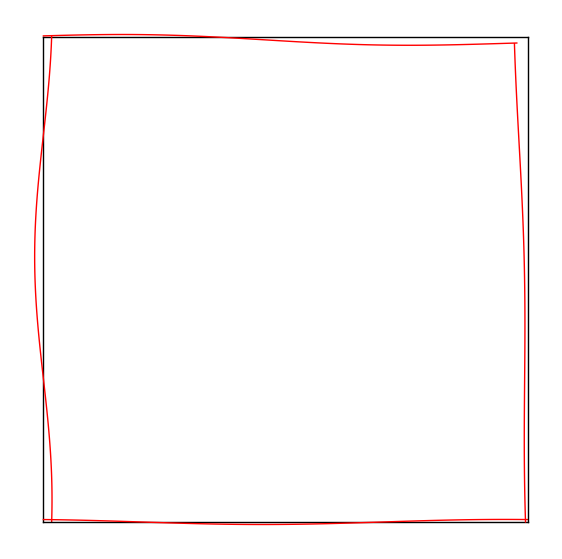

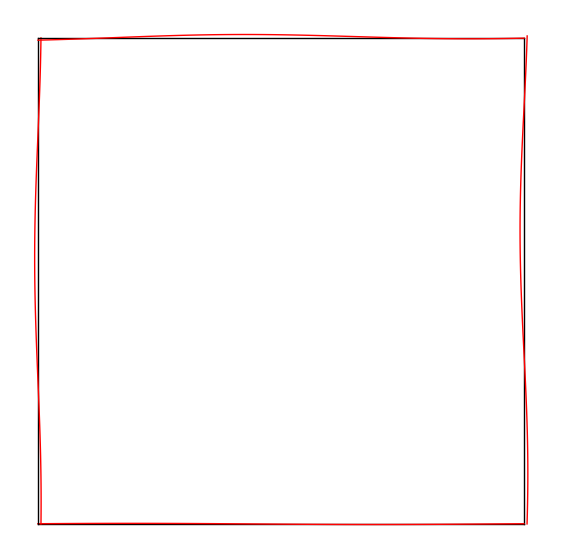

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

import copy
import random
import numpy as np
import matplotlib.pyplot as plt

import pygarment as pyg

garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0A36YXPNV0"
garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0AAY3NQH8J"


garment_id = os.path.basename(garment_path)

SPEC_FILE_PATH = os.path.join(garment_path, f"{garment_id}_specification.json")
pattern = pyg.pattern.wrappers.VisPattern(SPEC_FILE_PATH)

panel_svg_path_dict = {
    panel_name : pattern._draw_a_panel(
        panel_name, apply_transform=False, fill=True
    )
    for panel_name in pattern.panel_order()
}
stitch_dict = {
    i : v for i, v in enumerate(pattern.pattern['stitches'])
}




perturbed_dict = copy.deepcopy(panel_svg_path_dict)
perturbation_scale = 0.5  # Adjust this value to control perturbation amount

# Perturb the vertices in each panel
for panel_name, panel in perturbed_dict.items():
    if not panel:  # Skip empty panels
        continue
        
    # Generate perturbations for all vertices first
    perturbed_points = []
    for path in panel:
        if hasattr(path, 'start'):
            # Only perturb if not already in our list
            if not perturbed_points or path.start != perturbed_points[-1]:
                perturbed_point = path.start + complex(
                    random.uniform(-perturbation_scale, perturbation_scale),
                    random.uniform(-perturbation_scale, perturbation_scale)
                )
                perturbed_points.append(perturbed_point)
    
    # Make sure the last point connects to the first to close the loop
    perturbed_points.append(perturbed_points[0])
    
    # Apply perturbations to the paths
    point_idx = 0
    for path in panel:
        if hasattr(path, 'start') and hasattr(path, 'end'):
            path.start = perturbed_points[point_idx]
            point_idx += 1
            path.end = perturbed_points[point_idx]





N_SAMPLES = 100
BASE_AMPLITUDE = 0.07  # Base amplitude for wiggles
N_FREQUENCIES = 3     # Number of different frequencies to combine
MAX_FREQUENCY = 1      # Maximum frequency component

for panel_name in panel_svg_path_dict.keys():
    path = panel_svg_path_dict[panel_name][0]
    perturbed_path = perturbed_dict[panel_name][0]
    
    plt.figure(figsize=(7, 7))
    
    for edge_idx, segment in enumerate(path):
        # Original segment points
        segment_points = np.array([
            [segment.point(t).real, segment.point(t).imag]
            for t in np.linspace(0, 1, N_SAMPLES)
        ])
        
        # Base perturbed points
        t_vals = np.linspace(0, 1, N_SAMPLES)
        perturbed_segment_points = np.array([
            [perturbed_path[edge_idx].point(t).real, perturbed_path[edge_idx].point(t).imag]
            for t in t_vals
        ])
        
        # Calculate direction vector for the segment
        direction = perturbed_segment_points[-1] - perturbed_segment_points[0]
        normal = np.array([-direction[1], direction[0]])
        normal = normal / np.linalg.norm(normal)
        
        # Combine multiple frequencies with random phases and amplitudes
        wiggle_offset = np.zeros(len(t_vals))
        for _ in range(N_FREQUENCIES):
            frequency = random.uniform(1, MAX_FREQUENCY)
            phase = random.uniform(0, 2 * np.pi)
            amplitude = random.uniform(0.5, 1.0) * BASE_AMPLITUDE
            wiggle_offset += amplitude * np.sin(2 * np.pi * frequency * t_vals + phase)
            
        # Apply the wiggles perpendicular to the segment direction
        wiggled_points = perturbed_segment_points + wiggle_offset[:, np.newaxis] * normal
        
        # Plot original path
        plt.plot(
            segment_points[:, 0],
            segment_points[:, 1],
            'k-', linewidth=1
        )
        
        # Plot wiggled path
        plt.plot(
            wiggled_points[:, 0],
            wiggled_points[:, 1],
            'r-', linewidth=1
        )
    
    plt.axis('off')
    plt.show()

In [2]:
import os


'/media/hjp/db6095ca-a560-4c3a-90ad-b667ec189671/REFERENCES/3D_VTO/GarmentCode/GarmentCode'

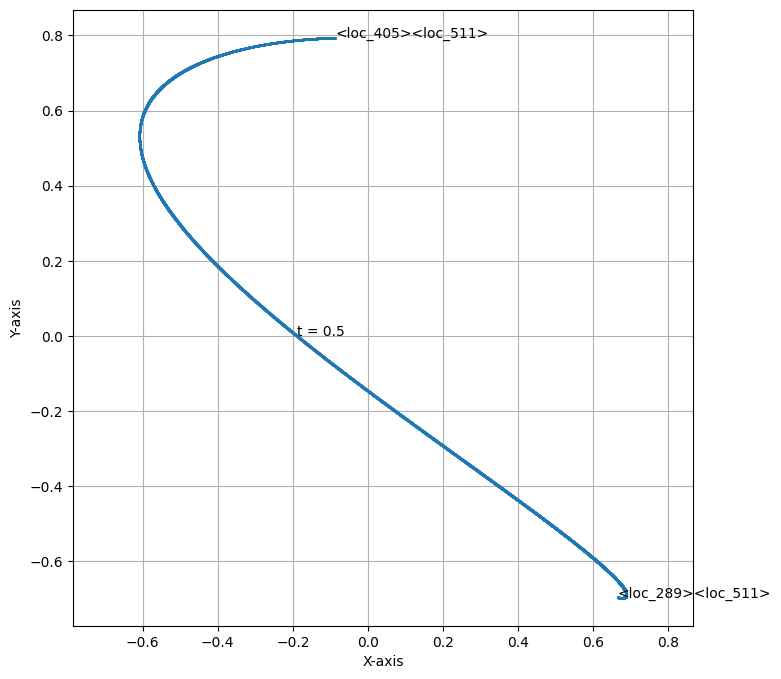

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate high-frequency pattern
t = np.linspace(0.25*np.pi, 0.5*np.pi, 5000)  # High-frequency sampling
t = np.linspace(0.5*np.pi, 0.6*np.pi, 5000)  # High-frequency sampling
x = np.sin( np.exp(t)* t) * np.cos(0.5 * t) * np.exp(-0.01 * t)  # High-frequency oscillations
y = np.cos(10 * t) * np.sin(0.5 * t) * np.exp(-0.01 * t)


# Plot the pattern
plt.figure(figsize=(8, 8))
plt.text(x[0], y[0], "<loc_289><loc_511>", fontsize=10)
plt.text(x[-1], y[-1], "<loc_405><loc_511>", fontsize=10)

plt.text(x[int(len(x)/2)], y[int(len(y)/2)], "t = 0.5", fontsize=10)
plt.plot(x, y, '.', markersize=2,)  # Dotted line with transparency
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.ylim(-0.2, 0.4)
plt.grid(True)
plt.axis('equal')

plt.show()

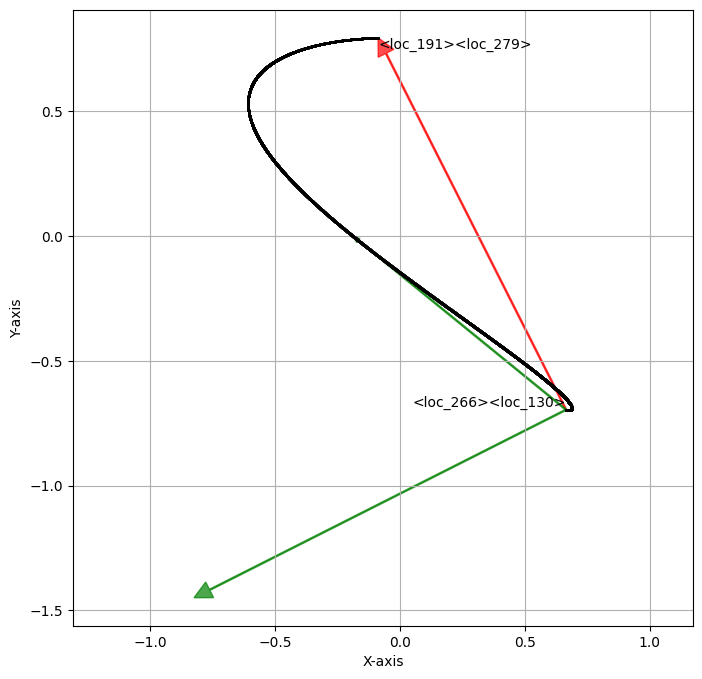

In [3]:
# ... existing imports ...

# Generate high-frequency pattern
t = np.linspace(0.5*np.pi, 0.6*np.pi, 5000)  # High-frequency sampling
x = np.sin(np.exp(t)* t) * np.cos(0.5 * t) * np.exp(-0.01 * t)
y = np.cos(10 * t) * np.sin(0.5 * t) * np.exp(-0.01 * t)

# Plot the pattern
plt.figure(figsize=(8, 8))

# Plot the original pattern
plt.plot(x, y, '.', markersize=2, color='black')

# Add vector from start to end
plt.arrow(
    x[0], y[0],                    # Start point
    x[-1] - x[0], y[-1] - y[0],    # Direction vector
    color='red',                    # Make the arrow red
    width=0.005,                    # Width of arrow
    head_width=0.07,                # Width of arrow head
    head_length=0.07,               # Length of arrow head
    length_includes_head=True,      # Arrow length includes head
    alpha=0.7
)

# Add vector from start to end
plt.arrow(
    x[0], y[0],                    # Start point
    -(y[-1] - y[0]),
    x[-1] - x[0],
    color='green',                    # Make the arrow red
    width=0.005,                    # Width of arrow
    head_width=0.07,                # Width of arrow head
    head_length=0.07,               # Length of arrow head
    length_includes_head=True,      # Arrow length includes head
    alpha=0.7
)

# Add vector to middle point
mid_idx = len(x) // 2
plt.arrow(
    x[0], y[0],                    # Start point
    x[mid_idx] - x[0], y[mid_idx] - y[0],  # Vector to middle point
    color='green',                  # Make the middle vector green
    width=0.005,
    head_width=0.02,
    head_length=0.03,
    length_includes_head=True,
    alpha=0.7
)


plt.text(
    x[0], y[0], '<loc_{0}><loc_{1}>'.format(
        int((x[0]+2) * 100),
        int((y[0]+2) * 100)
    ),
    fontsize=10, ha='right',
    va='bottom'
)
plt.text(
    x[-1], y[-1], '<loc_{0}><loc_{1}>'.format(
        int((x[-1]+2) * 100),
        int((y[-1]+2) * 100)
    ),
    fontsize=10, ha='left',
    va='top'
)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.ylim(-0.2, 0.4)
plt.grid(True)
plt.axis('equal')

plt.show()